In [33]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# AdaBoost

In [4]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)

In [5]:
ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [6]:
ada_pred = ada.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)
print(f"ada 정확도 : {ada_acc}")


ada 정확도 : 0.9


AdaBoostClassifier 매개변수
- base_estimator : DecisionTreeClassifier(max_depth=1) => 기본분류기 지정(기본값:의사결정트리)
- n_estimators : 부스팅을 수행할 기본 분류기의 개수(기본값 50)
- learning_rate : 학습률 지정(기본값:1.0)
- algoritm: 부스팅알고리즘을 선택(SAMMA, SAMMER)

# Gradient Boosting

In [7]:
gb = GradientBoostingClassifier(n_estimators=365, learning_rate = 0.1, max_depth=1)
gb

GradientBoostingClassifier(max_depth=1, n_estimators=365)

# GradientBoostingClassifier 매개변수
- n_estimators : 기본값 100, 부스팅을 수행할 기본 분류기의 개수 지정
- learning_rate : 기본값 0.1, 학습률 지정(작은 학습률은 모델을 안정적으로 만들고 과적합을 줄일 수 있지만 많은 분류기가 필요함)
- max_depth : 기본값 3, 트리의 최대 깊이 지정
- subsample : 기본값 1.0, 각 트리를 훈련시 사용할 훈련데이터의 샘플비율 지정
- loss : devinance(로지스틱손실), exponential(AdaBoost와 유사한 손실함수 사용)

In [8]:
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)
gb_pred

array([0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 2])

In [9]:
gb_acc = accuracy_score(y_test, gb_pred)

print(f"gb 정확도 : {gb_acc}")

gb 정확도 : 0.9666666666666667


# 트리시각화

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree #결정트리 시각화를 위한 plot_tree import

In [11]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
import pandas as pd

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

df['label'] = [iris.target_names[x] for x in iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
X = df.drop('label', axis=1)
y = df['label']
X
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: label, Length: 150, dtype: object

In [19]:
#모델생성
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3, min_samples_leaf=5)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [21]:
#모델 학습
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [22]:
#예측
print(clf.predict(X)[:3])

# print(X.columns)
#변수 중요도
for i, column in enumerate(X.columns):
    print(f"{column} 중요도 : {clf.feature_importances_[i]}")

# predict : 예측
# feature_importances_ : 변수 중요도
#각 특징이 모델의 예측에 기여하는 정도를 나타내고, 높은 값일수록 해당 특징이 중요하다고 해석됨
# get_params : DecisionTreeClassifier 클래스 인수 정보
# score : 성능 점수

print(clf.get_params())
print(f"정확도 : {clf.score(X, y)}")

['setosa' 'setosa' 'setosa']
sepal length (cm) 중요도 : 0.0
sepal width (cm) 중요도 : 0.0
petal length (cm) 중요도 : 0.6881645055774848
petal width (cm) 중요도 : 0.3118354944225151
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
정확도 : 0.9733333333333334


In [23]:
clf.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

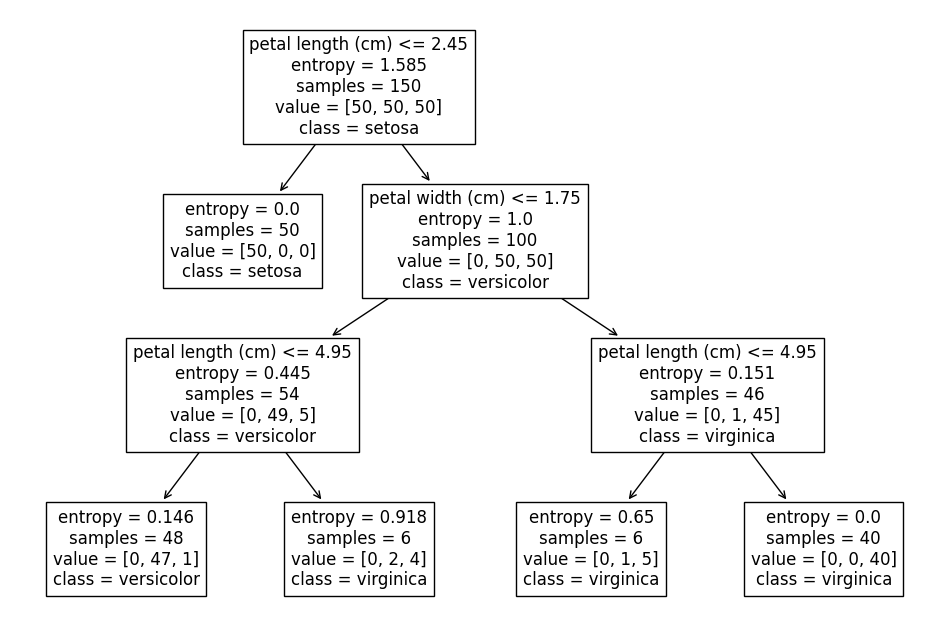

In [24]:
#시각화
plt.figure(figsize = (12, 8))
plot_tree(clf, feature_names=X.columns, class_names = clf.classes_)
plt.show()

In [29]:
import numpy as np
def get_info(dt_model, tree_type ='clf'):
    tree = dt_model.tree_

    #분할에 사용된 기준
    criterion = dt_model.get_params()['criterion']

    #assert문 : 주어진 조건이 참이 아닐경우 AssertionEerron를 발생시킴(디버깅, 테스트 목적으로 사용)
    #트리 유형이 유효한지 확인
    assert tree_type in ['clf', 'reg']

    #트리의 노드 수
    num_node = tree.node_count

    #노드 정보를 저장할 빈 리스트를 초기화
    info = []

    #트리의 각 노드 반복
    for i in range(num_node):
        temp_di = dict()

        #현재 노드가 분할을 나타내는지 확인
        if tree.threshold[i] != -2: #-2는 잎 노드를 나타냄
            #분할에 사용된 특징과 임계값 저장
            split_feature = tree.feature[i]
            split_thres = tree.threshold[i]

            #분할 질문
            temp_di['question'] = f"{split_feature} <= {split_thres:.3f}"

            #불순도와 노드에 포함된 샘플 수를 가져옴
            impurity = tree.impurity[i]
            sample = tree.n_node_samples[i]

            #불순도와 샘플 수 저장
            temp_di['impurity'] = f"{criterion} = {impurity:.3f}"
            temp_di['sample'] = sample

            #예측된 값(회귀) 클래스 확률(분류)
            value = tree.value[i]
            temp_di['value'] = value

            #분류 트리의 경우 예측된 클래스 레이블 저장
            if tree_type == 'clf':
                classes = dt_model.classes_
                idx = np.argmax(value)
                temp_di['class'] = classes[idx]

        #노드 정보를 리스트에 추가
        info.append(temp_di)

    return info

In [30]:
get_info(clf)

[{'question': '2 <= 2.450',
  'impurity': 'entropy = 1.585',
  'sample': 150,
  'value': array([[50., 50., 50.]]),
  'class': 'setosa'},
 {},
 {'question': '3 <= 1.750',
  'impurity': 'entropy = 1.000',
  'sample': 100,
  'value': array([[ 0., 50., 50.]]),
  'class': 'versicolor'},
 {'question': '2 <= 4.950',
  'impurity': 'entropy = 0.445',
  'sample': 54,
  'value': array([[ 0., 49.,  5.]]),
  'class': 'versicolor'},
 {},
 {},
 {'question': '2 <= 4.950',
  'impurity': 'entropy = 0.151',
  'sample': 46,
  'value': array([[ 0.,  1., 45.]]),
  'class': 'virginica'},
 {},
 {}]

In [25]:
gb = GradientBoostingClassifier(n_estimators=120, learning_rate = 0.1, max_depth=1)
gb

GradientBoostingClassifier(max_depth=1, n_estimators=120)

In [26]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=120)

In [27]:
first = gb.estimators_[0][0]
first

DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                      random_state=RandomState(MT19937) at 0x79507FD6A140)

[Text(0.5, 0.75, 'petal length (cm) <= 2.45\nfriedman_mse = 0.213\nsamples = 120\nvalue = -0.0'),
 Text(0.25, 0.25, 'friedman_mse = -0.0\nsamples = 37\nvalue = 2.162'),
 Text(0.75, 0.25, 'friedman_mse = -0.0\nsamples = 83\nvalue = -0.964')]

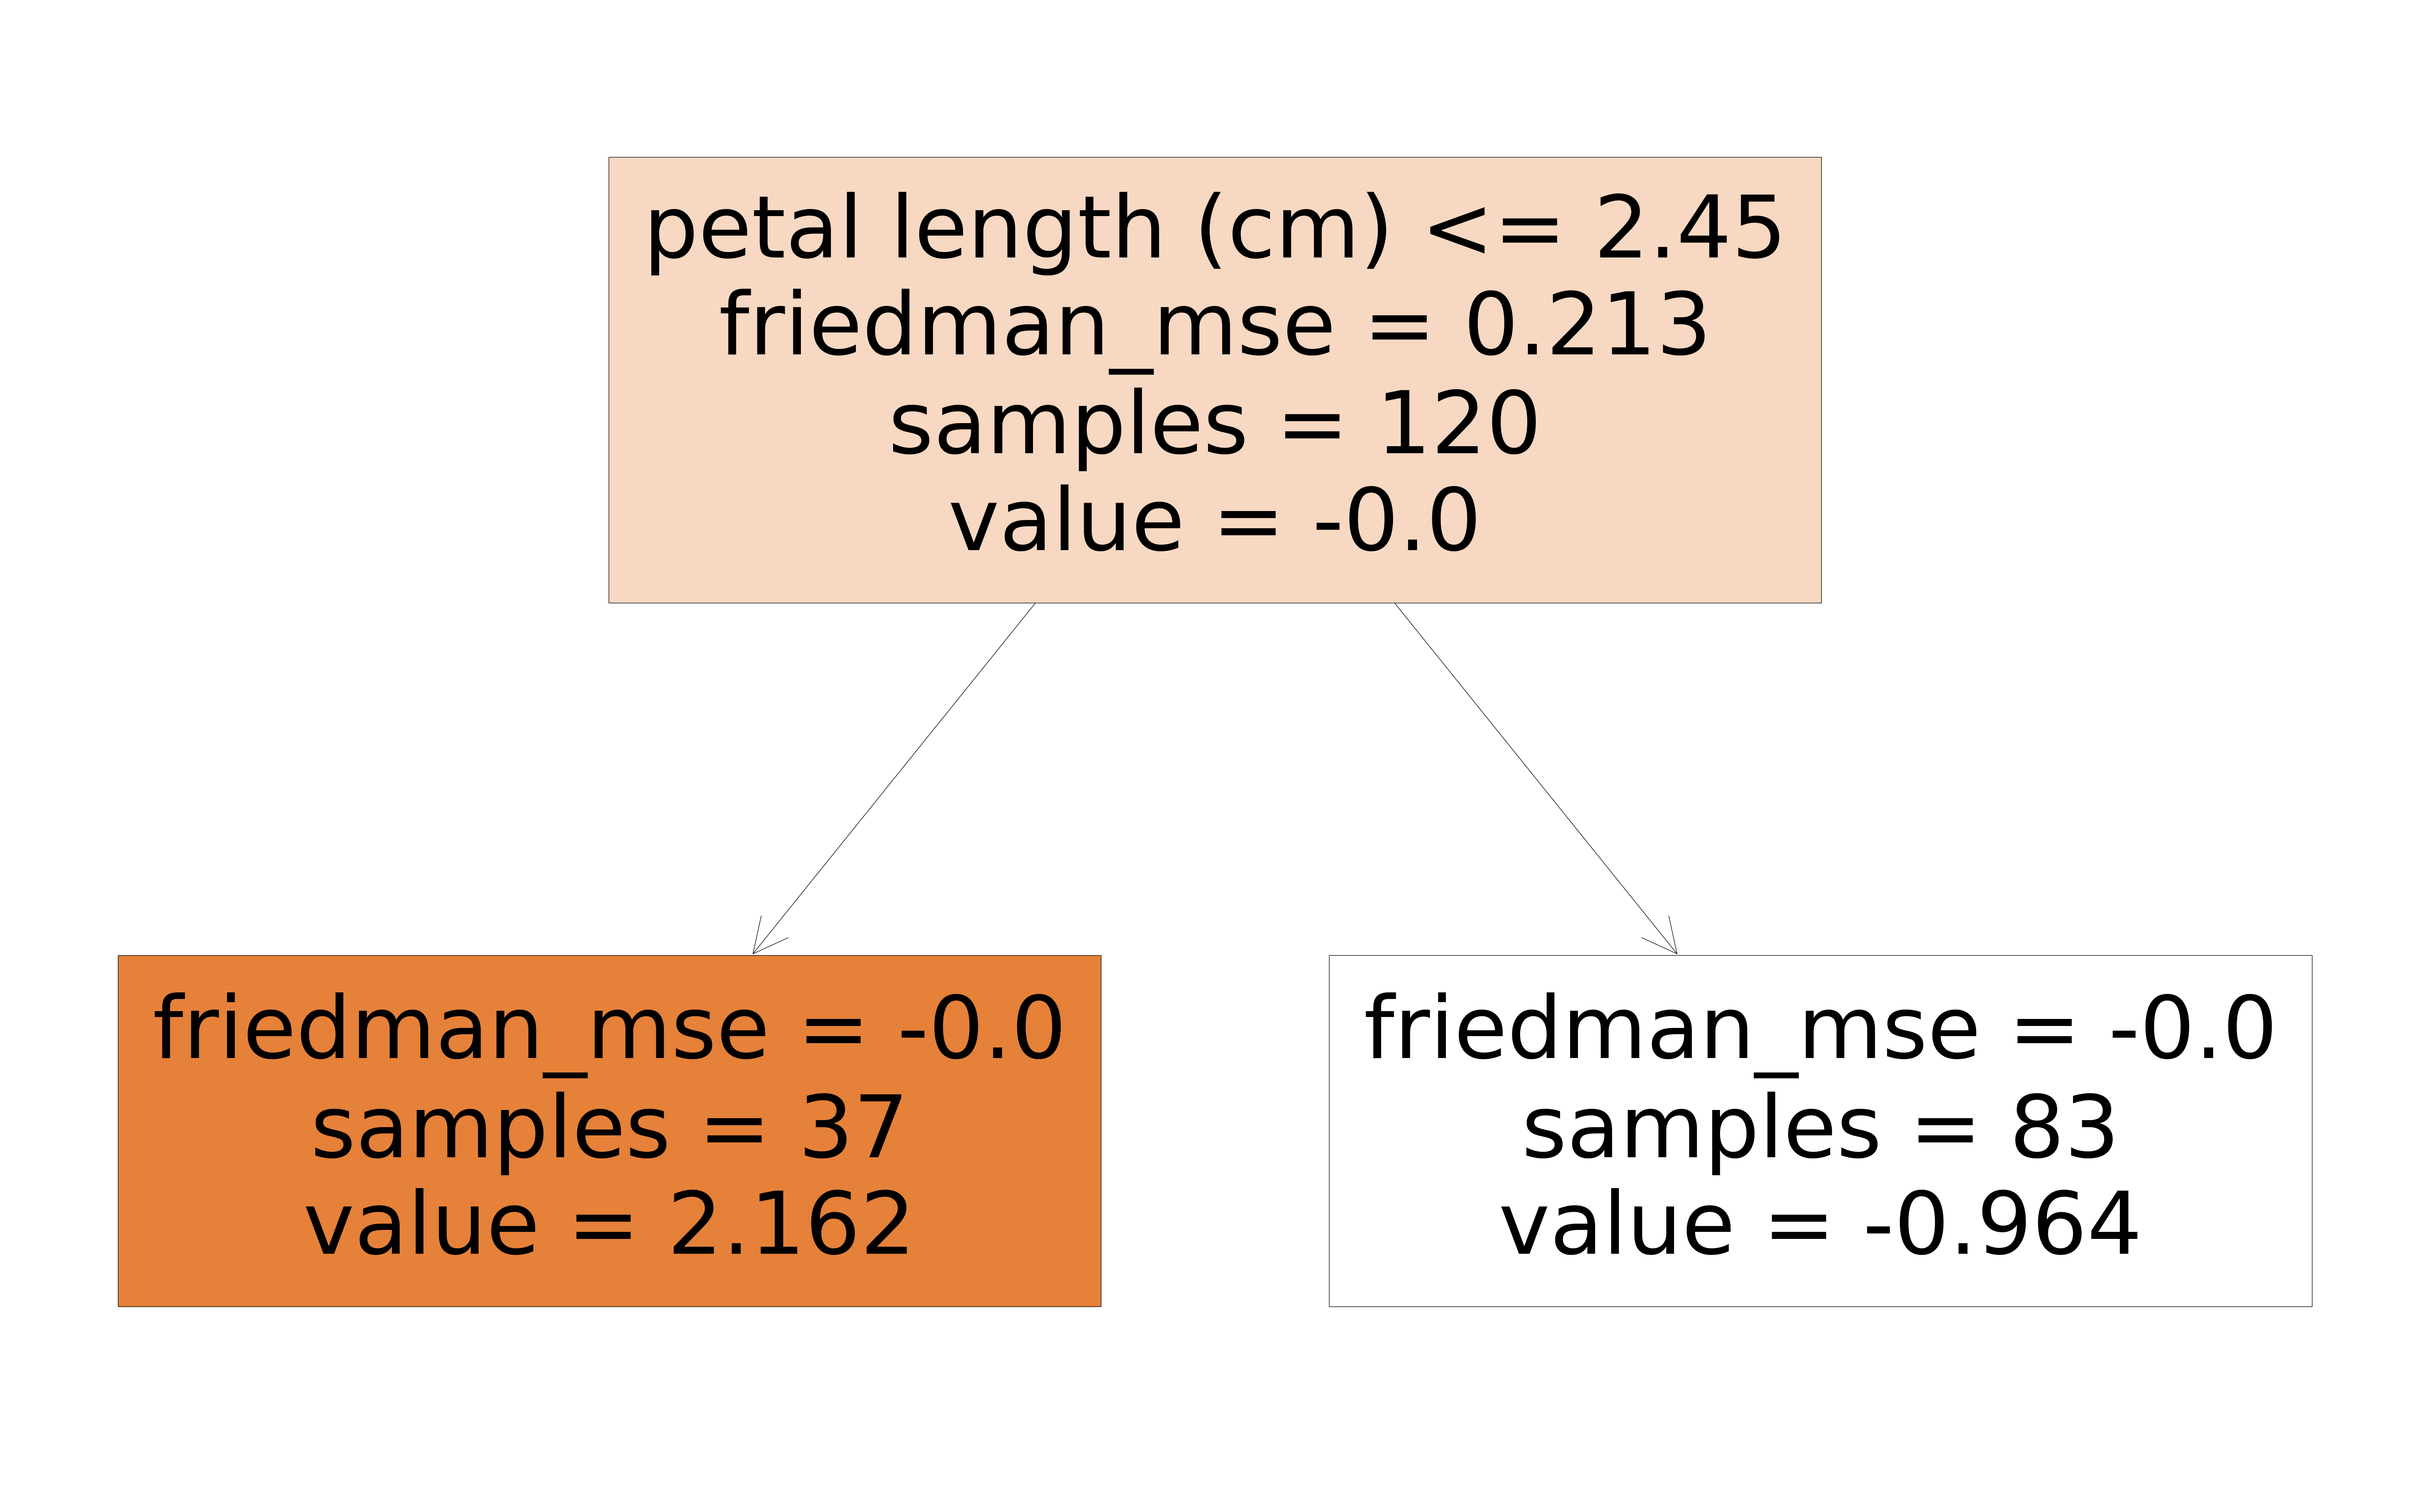

In [28]:
plt.figure(figsize = (80,50))
plot_tree(first, filled=True, feature_names = iris.feature_names)

# 회귀나무(DecisionTreeRegressor)


In [36]:
from sklearn import datasets
#사이킷런의 datasets 모듈을 사용하여 보스턴 주택가격 데이터셋을 로드
X, y = datasets.fetch_openml('boston', return_X_y = True)
# fetch_openml 함수: 사이킷런에서 제공하는 함수로 OpenML에서 데이터를 로드할 때 사용됨)(온라인 데이터 공유 플랫폼)
#사이킷런의 데이터셋과 유사한 형식으로 반환함

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [43]:
# 보스톤 집값 데이터
X
df = pd.DataFrame(X)
df['MEDV'] = y

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [45]:
X = df.drop("MEDV", axis =1)
y = df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [48]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=4, min_samples_leaf=10, random_state=100)

reg

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=100)

In [49]:
reg.fit(X,y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=100)

In [50]:
print(reg.predict(X)[:3])

[24.39262295 24.39262295 37.19      ]


In [52]:
#변수 중요도
for i, column in enumerate(X.columns):
    print(f"{column} 중요도 : {reg.feature_importances_[i]}")

print(reg.get_params())
print(f"정확도 : {reg.score(X, y)}") #성능평가 점수(R-square)

CRIM 중요도 : 0.03237114695674794
ZN 중요도 : 0.013969256913853721
INDUS 중요도 : 0.0
CHAS 중요도 : 0.0
NOX 중요도 : 0.016289232640106954
RM 중요도 : 0.6378647889973513
AGE 중요도 : 0.0
DIS 중요도 : 0.0019003403533123246
RAD 중요도 : 0.0
TAX 중요도 : 0.0
PTRATIO 중요도 : 0.008088463872640178
B 중요도 : 0.0
LSTAT 중요도 : 0.28951677026598766
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 100, 'splitter': 'best'}
정확도 : 0.8221210054368892


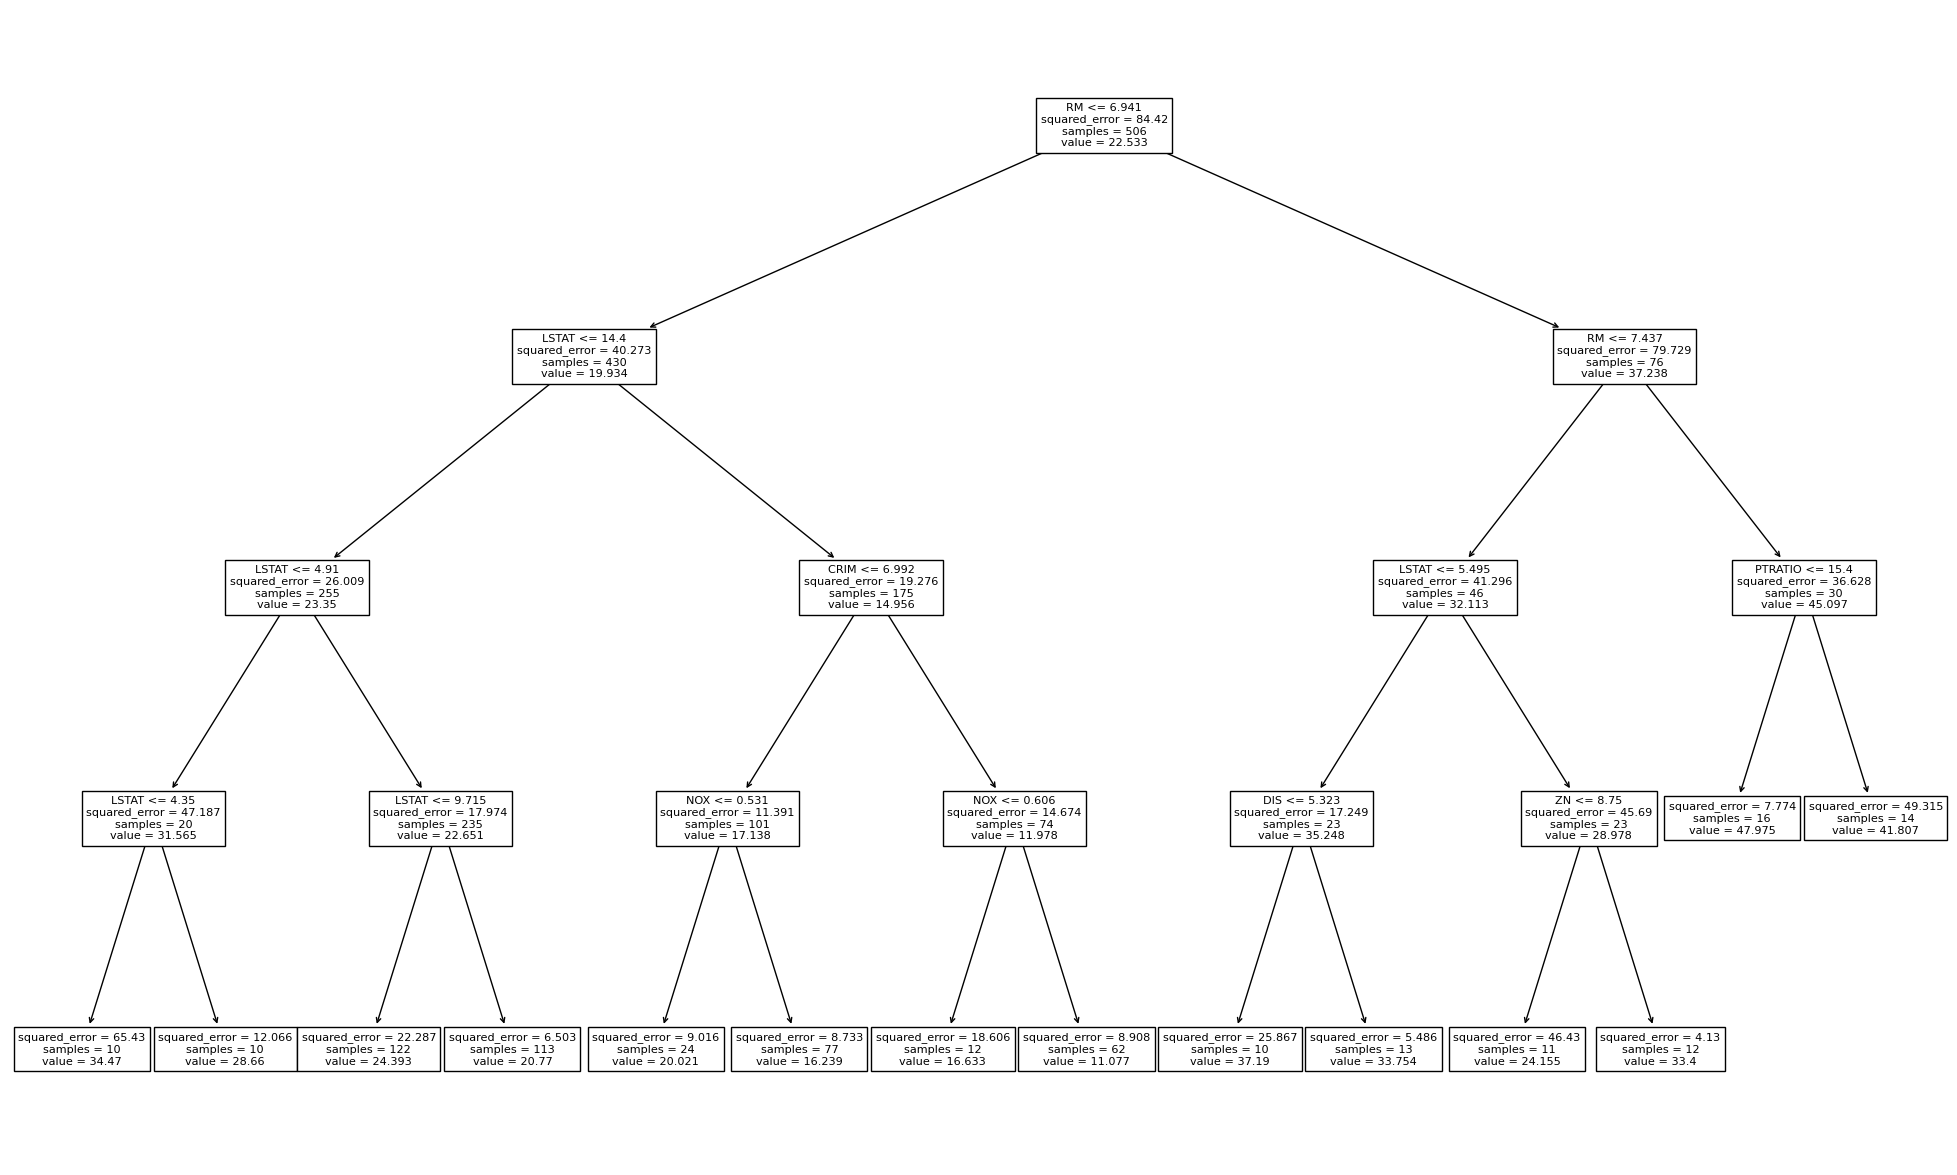

In [55]:
# 트리시각화
plt.figure(figsize=(25,15))
plot_tree(reg, feature_names=X.columns)
plt.show()

In [53]:
get_info(reg, tree_type='reg')

[{'question': '5 <= 6.941',
  'impurity': 'squared_error = 84.420',
  'sample': 506,
  'value': array([[22.53280632]])},
 {'question': '12 <= 14.400',
  'impurity': 'squared_error = 40.273',
  'sample': 430,
  'value': array([[19.93372093]])},
 {'question': '12 <= 4.910',
  'impurity': 'squared_error = 26.009',
  'sample': 255,
  'value': array([[23.34980392]])},
 {'question': '12 <= 4.350',
  'impurity': 'squared_error = 47.187',
  'sample': 20,
  'value': array([[31.565]])},
 {},
 {},
 {'question': '12 <= 9.715',
  'impurity': 'squared_error = 17.974',
  'sample': 235,
  'value': array([[22.6506383]])},
 {},
 {},
 {'question': '0 <= 6.992',
  'impurity': 'squared_error = 19.276',
  'sample': 175,
  'value': array([[14.956]])},
 {'question': '4 <= 0.531',
  'impurity': 'squared_error = 11.391',
  'sample': 101,
  'value': array([[17.13762376]])},
 {},
 {},
 {'question': '4 <= 0.606',
  'impurity': 'squared_error = 14.674',
  'sample': 74,
  'value': array([[11.97837838]])},
 {},
 {},
